# **Unsupervised Learning Project: AllLife Bank Customer Segmentation**

Unsupervised Learning Project. We will be using **Credit Card Customer Data**.

--------------------------------
## **Context** 
-------------------------------

**AllLife Bank wants to focus on its credit card customer base** in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. 

Another insight from the market research was that the customers perceive the support services of the bank poorly. Based on this, the operations team wants to upgrade the service delivery model, to ensure that customers' queries are resolved faster. The head of marketing and the head of delivery, both decide to reach out to the Data Science team for help.


----------------------------
## **Objective**
-----------------------------

**Identify different segments in the existing customer base**, taking into account their spending patterns as well as past interactions with the bank.

--------------------------
## **About the data**
--------------------------

Data is available on customers of the bank with their credit limit, the total number of credit cards the customer has, and different channels through which the customer has contacted the bank for any queries. These different channels include visiting the bank, online, and through a call center.

- **Sl_no** - Customer Serial Number
- **Customer Key** - Customer identification
- **Avg_Credit_Limit**	- Average credit limit (currency is not specified, you can make an assumption around this)
- **Total_Credit_Cards** - Total number of credit cards 
- **Total_visits_bank**	- Total bank visits
- **Total_visits_online** - Total online visits
- **Total_calls_made** - Total calls made

## **Importing libraries and overview of the dataset**

**Note:** Please make sure you have installed the sklearn_extra library before running the below cell. If you have not installed the library, please run the below code to install the library:

!pip install scikit-learn-extra

In [2]:
!pip install scikit-learn-extra

In [3]:
# Importing all the necessary packages

import pandas as pd

import numpy as np

import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [4]:
data = pd.read_excel('Credit+Card+Customer+Data.xlsx')

data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **Check the info of the data**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are **660 observations and 7 columns** in the dataset.
- All the columns have 660 non-null values, i.e., there are **no missing values**.
- **All the columns are of integer data type**.

**There are no missing values. Let us now figure out the number of unique values in each column.** 

In [6]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has duplicate values. We will treat the duplicate customer keys before applying any algorithm.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking duplicate customer keys**

As mentioned above, the Customer Key column has duplicate values. Let's find the rows with duplicate customer keys.

### **Question 1: Drop the rows with duplicate customer keys (2 Marks)**

In [7]:
# There are some duplicates in the column 'Customer Key'. Let us explore

duplicate_keys = data['Customer Key'].duplicated()

data[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


- There are **5 duplicate customer keys**. We can **drop these observations**.

**Note:** We are not making any assumptions about which row with the duplicate keys should be dropped. For example, if row 2 and row 10 have duplicate customer keys, then any one of the two rows can be dropped.

In [8]:
# let's drop duplicate keys

data = data.drop_duplicates(subset='Customer Key')

### **Dropping columns** 

We have done some basic checks. Now, **let's drop the variables that are not required for our analysis**.

In [9]:
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

### **Checking duplicate rows**

Now, that we have dropped unnecessary columns, we can again check for duplicates. **Duplicates would mean customers with identical features.**

In [10]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


- There are 11 duplicate rows. We can drop these duplicate rows from the data.

In [11]:
data = data[~data.duplicated()]

In [12]:
data.shape

(644, 5)

- After removing the duplicate keys, the duplicate rows, and dropping unnecessary columns, there are 644 unique observations and 5 columns in our data.

### **Summary Statistics**

### **Question 2: Write your observations on the summary statistics of the data (1 Mark)**

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


**Observations:**

- The Avg_Credit_Limit has a high range from 3000 to 200000 on money. The average is approximately 34543, but with a high standard deviation of 37428.
- The max amount on the Total_Credit_Cards is 10 and the lowest is 1, with a mean between 4 or 5 credit cards.
- There is a low range on Total_visits_bank from 0 to 5 and a mean of 2 visits.
- Total_visits_online has the highest range alternative from 0 to 15 online visits. This is logic because people prefer to resolve problems through a website rather than calling or going to the bank and waste time.
- On Total_calls_made we have a range from 0 to 10 calls with an average between 3 and 4 calls.

**Now, let's go ahead with exploring each variable at hand.**

### **Question 3: Check the distribution and outliers for each variable in the data.**

- **Check the distribution of all variables (use .hist() attribute) (2 Marks)**
- **Check outliers for all variables (use sns.boxplot()) (2 Mark)**
- **Write your observations (1 Marks)**

Avg_Credit_Limit
Skew : 2.19


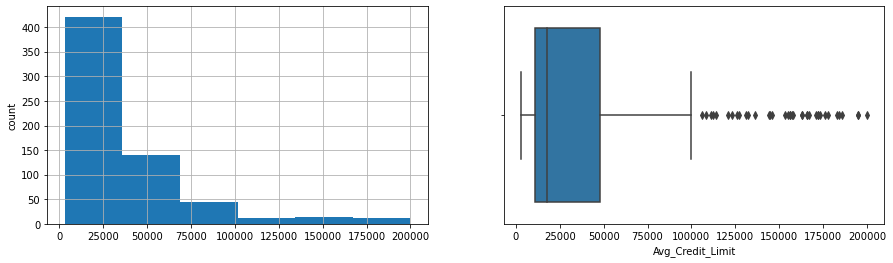

Total_Credit_Cards
Skew : 0.17


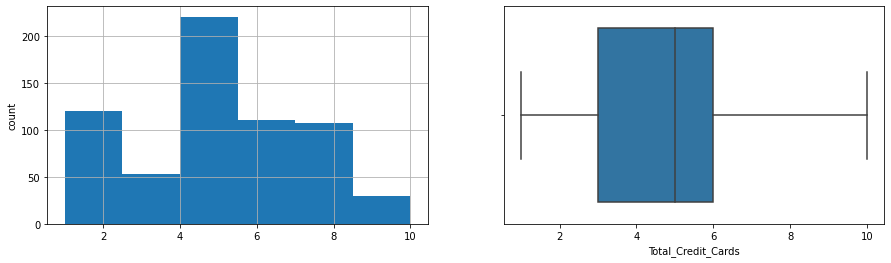

Total_visits_bank
Skew : 0.15


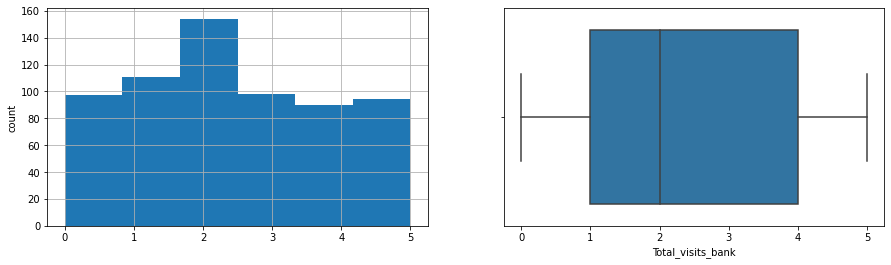

Total_visits_online
Skew : 2.21


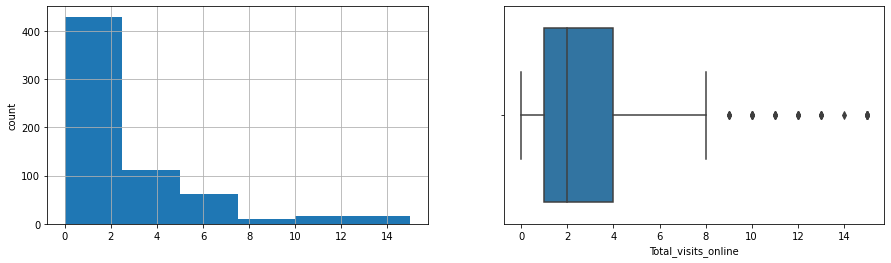

Total_calls_made
Skew : 0.65


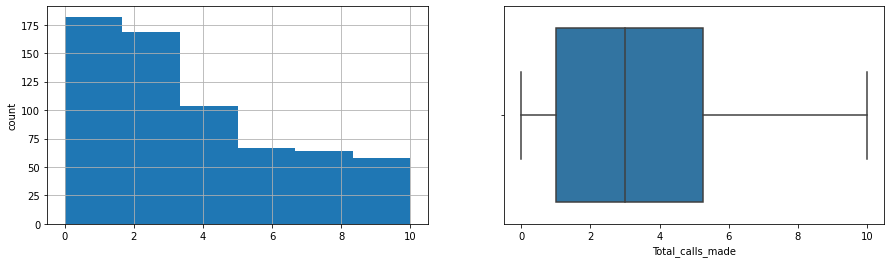

In [14]:
# complete the BELOW code by filling the blanks, before running the cell to avoid any errors 

for col in data.columns:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 6)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observation:**

- Avg_Credit_Limit and Total_visits_online have outliers, but analyzing them, there is few people with a lot of credit limit in their credit card. So those values are acceptable.
- Avg_Credit_Limit, Total_calls_made and Total_visits_online have a right skewed distribution.
- Total_visits_bank has a distribution very close to uniform.
- Total_Credit_Cards follow a normal distribution with a low value on skewness.

### **Checking correlation**

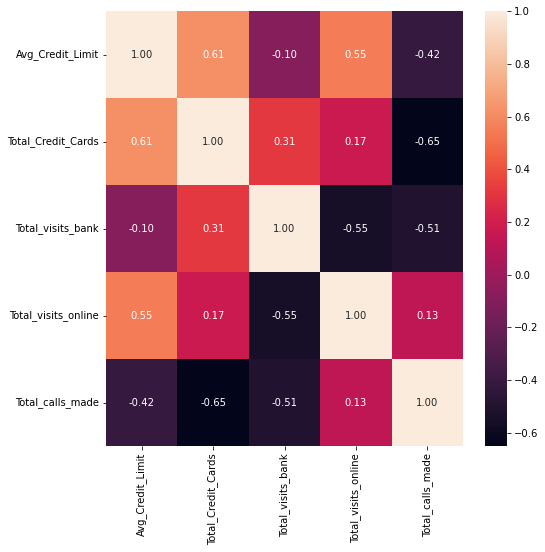

In [15]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online which makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

### **Scaling the data**

In [16]:
scaler = StandardScaler()

# Standardize the data to have a mean of ~0 and a variance of 1
data_scaled = StandardScaler().fit_transform(data)

### **Applying PCA on scaled data**

In [17]:
from sklearn.decomposition import PCA

n = data.shape[1]

# Create a PCA instance: pca
pca = PCA(n_components=n)

principal_components = pca.fit_transform(data_scaled)

# Save components to a DataFrame
data_pca = pd.DataFrame(principal_components, columns = data.columns)

In [18]:
# Creating copy of the data to store labels from each algorithm

data_copy = data_pca.copy(deep = True)

## **K-Means**

Let us now fit the K-means algorithm on our pca components and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the Sum of Squared Error (SSE) for each K
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and plot the elbow curve

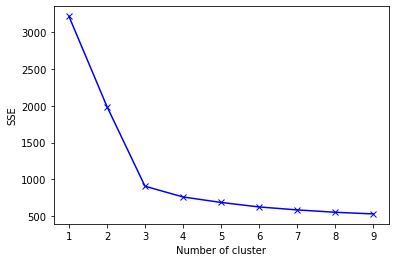

In [19]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the pca components to the algorithm. 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca)
    sse[k] = kmeans.inertia_     # Use inertia attribute from the clustering object and store the inertia value for that K

# step 3
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

**Observations:**

- We can see from the plot that there is a hughe fall from 1 to 3 and were we can see a clear elbow on k = 3. So, lets use k=3 clusters for our K-Means model.

### **Question 4:** 

- **Interpret the above elbow plot and state the reason for choosing K=3 (1 Mark)**
- **Fit the K-means algorithms on the pca components with the number of clusters equal to 3 (2 Mark)**
- **Store the predictions as 'Labels' to the 'data_copy' and 'data' DataFrames (2 Marks)**

In [20]:
kmeans = KMeans(n_clusters = 3, random_state = 1)  # Apply the K-Means algorithm
kmeans.fit(data_pca)  # Fit the kmeans function on the pca components

# Adding predicted labels to the original data and the copied data 
data_copy['Labels'] = kmeans.predict(data_pca)     # Save the predictions on the pca components from K-Means
data['Labels'] = kmeans.predict(data_pca)             # Save the predictions on the pca components from K-Means

We have generated the labels with K-means. Now, let us look at the various features based on the labels.

### **Question 5: Create the cluster profiles using the below summary statistics and box plots for each label (6 Marks)**

In [21]:
# Number of observations in each cluster
data.Labels.value_counts()

1    374
0    221
2     49
Name: Labels, dtype: int64

In [22]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()

median = data.groupby('Labels').median()

df_kmeans = pd.concat([mean, median], axis = 0)

df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


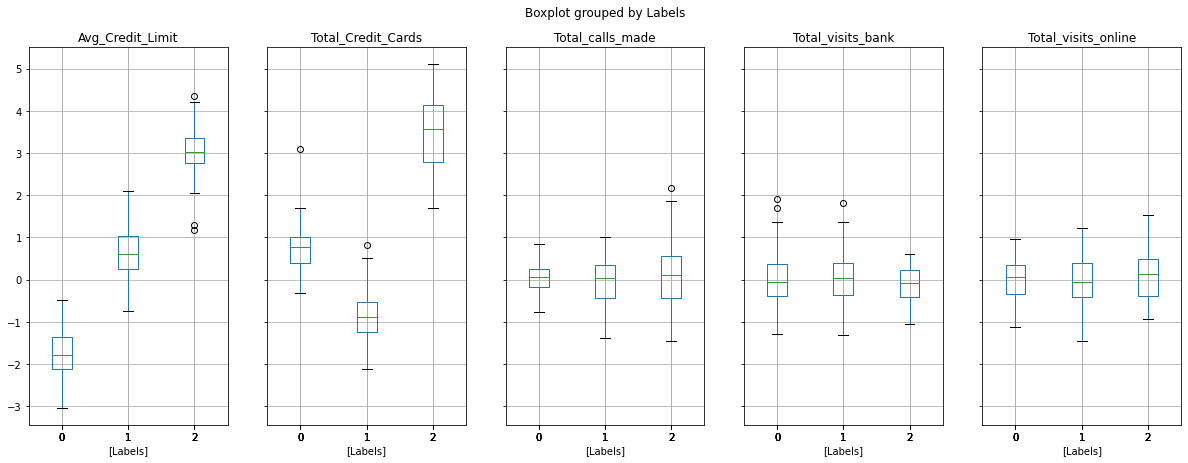

In [23]:
# Visualizing different features w.r.t K-means labels
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**

- This looks like a little bit skewed clustering, having 49 observations in one cluster and 374 in another. 

- **Cluster 0** seems to have people of low income. These people have the lowest credit limit and number of credit cards. This type of people tend to made a call for help more than the other clusters with an average of almost 7 (6.89) calls and the least visits to the bank with ~1 visit. These characteristics are traits of **lower class people or just people that are no interested in spending too much money**.
- **Cluster 1** seems to have people on a intermediate income. These people have a moderate credit limit and number of credit cards. This type of people tend to visit more the bank for help, rather than visiting online or make a call, with an average of 3.48 visits and the least number of visits online with an average of almost 1 (~0.97) visit. These characteristics are traits of **medium class people**.
- **Cluster 3** seems to have people of high income. These people have a high average on the credit limit and the total number of credit cards. This type of people tend to look for help a lot more online than any other option with an average of ~10.97 visits and the least number of visits to the bank with an average of ~0.59 visits. These characteristics are traits of **high class people that spend much money and prefer to seek for help through the webpage for safety**.
- This clustering solution gives us good insights into potential clusters of different class of people, but is not very useful as it is resulting in one very small cluster, another one moderate and the last one is big. We should try other algorithms to see if we can do better.

## **Gaussian Mixture Model**

Let's now create clusters using the Gaussian Mixture Model.

### **Question 6:** 

- **Apply the Gaussian Mixture Model algorithm on the pca components with n_components=3 and random_state=1 (2 Marks)** 
- **Create the cluster profiles using the below summary statistics and box plots for each label (2 Marks)**
- **Compare the clusters from both algorithms - K-means and Gaussian Mixture Model (1 Mark)**

In [24]:
gmm = GaussianMixture(n_components = 3, random_state = 1)     # Apply the Gaussian Mixture algorithm on the pca components with n_components=3 and random_state=1

gmm.fit(data_pca)    # Fit the model on the pca components

data_copy['GmmLabels'] = gmm.predict(data_pca)

data['GmmLabels'] = gmm.predict(data_pca)

In [25]:
# Number of observations in each cluster
data.GmmLabels.value_counts()

1    374
0    221
2     49
Name: GmmLabels, dtype: int64

In [26]:
# Calculating the summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]

mean = data.groupby('GmmLabels').mean()

median = data.groupby('GmmLabels').median()

df_gmm = pd.concat([mean, median], axis = 0)

df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,33893.048128,140102.040816,12000.0,31500.0,145000.0
Total_Credit_Cards,2.411765,5.508021,8.775510,2.0,6.0,9.0
Total_visits_bank,0.945701,3.489305,0.591837,1.0,3.0,1.0
Total_visits_online,3.561086,0.975936,10.979592,4.0,1.0,11.0
Total_calls_made,6.891403,1.997326,1.102041,7.0,2.0,1.0


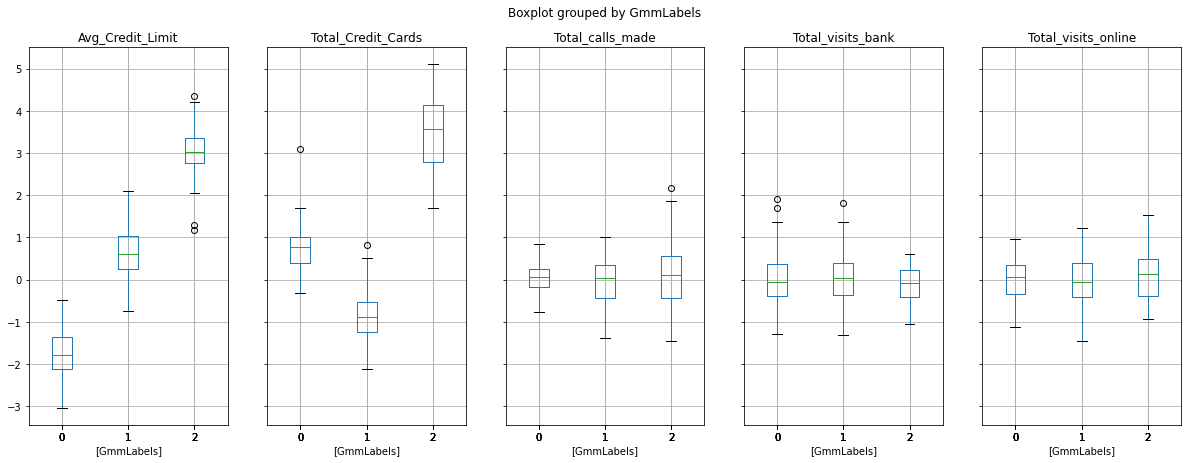

In [27]:
# Plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]

data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))

plt.show()

**Cluster Profiles:**

- Cluster 0
    - There are 221 people in this cluster.
    - Most of the people in this cluster have a low credit limit on average and a low number of credit cards.
    - The people in this cluster tend to look for help through calls (6.89 calls) and then visit the online page (3.56 visits).
    - The people in this cluster do not like to look for help by going to the bank (almost 1 visit).
- Cluster 1
    - There are 374 people in this cluster.
    - Most of the people in this cluster have a moderate credit limit on average and a moderate number of credit cards.
    - The people in this cluster tend to look for help by visitng the bank (3.48 visits) and then make a call (2 calls).
    - The people in this cluster do not like to look for help by visiting the online page (almost 1 visit).
- Cluster 2
    - There are 49 people in this cluster.
    - Most of the people in this cluster have a high credit limit on average and a high number of credit cards.
    - The people in this cluster tend to look for help by visitng the online page by far (10.97 visits) and then make a call (1 call).
    - The people in this cluster do not like to look for help visitng the bank (0.59 visit).

**Comparing Clusters:**
1. We have the same distribution of people in each cluster with the GMM and K-means algorithm.
2. The cluster profiles are the same for the two algorithms.

## **K-Medoids**

### **Question 7:** 

- **Apply the K-Medoids clustering algorithm on the pca components with n_clusters=3 and random_state=1 (2 Marks)** 
- **Create cluster profiles using the below summary statistics and box plots for each label (2 Marks)**
- **Compare the clusters from both algorithms - K-Means and K-Medoids (2 Marks)**

In [32]:
kmedo = KMedoids(n_clusters = 3, random_state = 1)      # Apply the K-Medoids algorithm on the pca components with n_components=3 and random_state=1

kmedo.fit(data_pca)      # Fit the model on the pca components

data_copy['kmedoLabels'] = kmedo.predict(data_pca)

data['kmedoLabels'] = kmedo.predict(data_pca)

In [33]:
# Number of observations in each cluster
data.kmedoLabels.value_counts()

2    289
0    222
1    133
Name: kmedoLabels, dtype: int64

In [34]:
# Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()

median = data.groupby('kmedoLabels').median()

df_kmedoids = pd.concat([mean, median], axis = 0)

df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']

df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12216.216216,85052.631579,28449.826990,12000.0,68000.0,20000.0
Total_Credit_Cards,2.423423,7.030075,5.363322,2.0,7.0,5.0
Total_visits_bank,0.950450,1.691729,3.830450,1.0,2.0,4.0
Total_visits_online,3.554054,4.639098,0.982699,4.0,2.0,1.0
Total_calls_made,6.878378,1.969925,1.851211,7.0,2.0,2.0


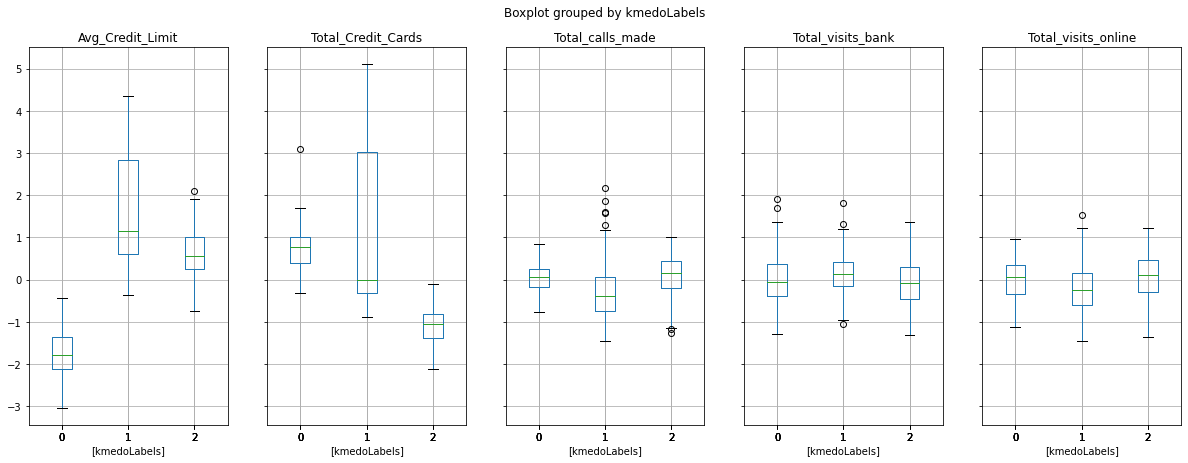

In [35]:
# Plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]

data_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))

plt.show()

**Cluster Profiles:**
- Cluster 0
    - There are 222 people in this cluster.
    - Most of the people in this cluster have a low credit limit on average and a low number of credit cards.
    - The people in this cluster tend to look for help through calls (6.87 calls) and then visit the online page (3.55 visits).
    - The people in this cluster do not like to look for help by going to the bank (almost 1 visit).
- Cluster 1
    - There are 133 people in this cluster.
    - Most of the people in this cluster have a high credit limit on average and a high number of credit cards.
    - The people in this cluster tend to look for help by visitng the online page by far (4.63 visits) and then make a call (almost 2 calls).
    - The people in this cluster do not like to look for help visitng the bank (1.69 visits).
- Cluster 2
    - There are 289 people in this cluster.
    - Most of the people in this cluster have a moderate credit limit on average and a moderate number of credit cards.
    - The people in this cluster tend to look for help by visitng the bank (3.83 visits) and then make a call (1.85 calls).
    - The people in this cluster do not like to look for help by visiting the online page (almost 1 visit).

Let's compare the clusters from K-Means and K-Medoids 

In [36]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features]

comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12216.216216,12239.819005,2.423423,2.411765,0.950450,0.945701,3.554054,3.561086,6.878378,6.891403
group_1 Mean,85052.631579,33893.048128,7.030075,5.508021,1.691729,3.489305,4.639098,0.975936,1.969925,1.997326
group_2 Mean,28449.826990,140102.040816,5.363322,8.775510,3.830450,0.591837,0.982699,10.979592,1.851211,1.102041
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,68000.000000,31500.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,20000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Comparing Clusters:**
1. There is a difference in the distribtuion of each cluster in both the algorithms. The cluster groups in K-Medoids are more evenly distributed since it uses median which is less likely to not get affected by the outliers.
2. The cluster profiles are same for both the algorithms, the number of the cluster is changing however the cluster profiles remains the same.
3. K-Medoids is better for this dataset since it has more evenly distributed the clusters and each cluster has their profile.